# Boolean Indexing

### Objectives
After this lesson you should be able to...
+ Use the naked brackets **`[]`** for boolean indexing - an exception to the rule of using **`.loc`** or **`.iloc`**
+ Create 'criteria' with boolean comparisons
+ Create 'criteria' with the index
+ Build complex criteria multiple boolean comparisons
+ Keywords **`and`**, **`or`** and **`not`** do NOT work in pandas when creating multiple comparison logic. Use **`&, |, ~`** instead.
+ Grab stock market data with the **`pandas_datareader`** package
+ Use boolean Series as a 0/1 numeric Series to do basic calculations such as **`sum`**, and **`mean`**

### Prepare for this lesson by...
[ALWAYS READ THE DOCUMENTATION BEFORE A LESSON!](http://pandas.pydata.org/pandas-docs/stable/)
+ Read [Boolean indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)
+ Read [Indexing with isin](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-with-isin)

### Introduction
A common method of extracting the values in a Series is to choose them based on certain criteria. Boolean indexing is done by passing a boolean (only true/false values) array or Series to the **`[ ]`** operator. If a Series is passed, every index in the outer Series must have a true value associated to it in the inner Series. If an array is passed, it must be the same length as the Series.

In [19]:
import pandas as pd
import numpy as np

In [20]:
# create a Series of values from a standard normal distribution
s = pd.Series(np.random.randn(7), index=list('abcdefg'))
s

a    0.094119
b    0.318688
c   -0.944710
d   -0.118580
e   -1.243051
f    0.745785
g    0.107881
dtype: float64

### It's OK to use [ ] with boolean indexing
The previous notebook cautioned to use **`.iloc`** or **`.loc`** when accessing elements of a Series. Boolean indexing is an exception to this rule and the True/False sequence can be placed directly inside the bracket operator.

In [21]:
# Create a list of booleans that is the same length of the Series
# Can use a numpy array or a Series as well
keep = [True, False, True, False, False, True, False]

In [22]:
# This will keep the first, third and sixth elements (indices where the list is True)
s[keep]

a    0.094119
c   -0.944710
f    0.745785
dtype: float64

### Vectorized Comparisons for Series
Each element in a Series can be compared to another value with a boolean as the result. All the normal 'rich' comparison operation work: <, >, <=, >=, ==, !=

In [23]:
# compare against being > 0
s > 0

a     True
b     True
c    False
d    False
e    False
f     True
g     True
dtype: bool

### Create 'criteria' for boolean selection
A common thing to do with data is to filter it basd on some criteria. The comparison with 0 in the above code cell returned a Series of booleans. This Series can be passed to the brackets operator to select only those Series elements that have values greater than 0.

In [24]:
# Save criteria of boolean Series
criteria = s > 0

In [25]:
# we can now pass this criteria to our original series to get only values above 0
s[criteria]

a    0.094119
b    0.318688
f    0.745785
g    0.107881
dtype: float64

In [26]:
# you can do this all in one step without an intermediate variable
s[s > 0]

a    0.094119
b    0.318688
f    0.745785
g    0.107881
dtype: float64

### Using the index as a comparison
You can also use a comparison with respect to the index to return boolean values. This is a little strange but shows that similarity of the index to the values of the Series.

In [27]:
# get all indicies that are lexicographically greater than or equal to 'c'
criteria = s.index >= 'c'

criteria

array([False, False,  True,  True,  True,  True,  True], dtype=bool)

In [28]:
# boolean select in same way
s[criteria]

c   -0.944710
d   -0.118580
e   -1.243051
f    0.745785
g    0.107881
dtype: float64

### Using `isin` method to check for multiple equalities
Both the Series and the Index objects have the same method **`isin`** (read 'is in') that checks whether each element is a member of a given list.

In [29]:
# Checks whether the index is 'a' or 'c'
criteria = s.index.isin(['a','c'])
criteria

array([ True, False,  True, False, False, False, False], dtype=bool)

In [30]:
# and now display the index b
s[criteria]

a    0.094119
c   -0.944710
dtype: float64

In [31]:
# Wait, wasn't that really repetitive?
# of course! We could have just used .loc and passed it a list
s.loc[['a', 'c']]

a    0.094119
c   -0.944710
dtype: float64

### More complex boolean slicing
Any number of boolean conditions can be strung together to retrieve certain values just as they can in python. The key words **`and`**, **`or`** and **`not`** do not with pandas and numpy. 

Instead, `and` is replaced with **`&`**, `or` with **`|`** and `not` with **`~`**. Each comparison also must be wrapped in parentheses.

In [32]:
# lets start with a long series of numbers
s = pd.Series(np.arange(500))

In [33]:
#Lets get all the numbers that are divisible by both 2 and 13
# or divisible by 100
criteria = (s % 2 == 0) & (s % 13 == 0) | (s % 100 == 0)

In [34]:
# inspect criteria
criteria.head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [35]:
# use the tilde to invert criteria
# ~ represents `not`
~criteria.head()

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [36]:
# every number here must meet the above criteria
s[criteria]

0        0
26      26
52      52
78      78
100    100
104    104
130    130
156    156
182    182
200    200
208    208
234    234
260    260
286    286
300    300
312    312
338    338
364    364
390    390
400    400
416    416
442    442
468    468
494    494
dtype: int32

In [37]:
# can reverse the criteria
s[~criteria].head()

1    1
2    2
3    3
4    4
5    5
dtype: int32

# Case Study: Calculating Normality of Stock Market Returns
We will examine the returns of different stocks to determine if their daily returns follow a normal distribution. Before we begin you will have to install the third-party library **`pandas-datareader`**. This library does not come pre-packaged with Anaconda so you will have to install it by opening up a terminal and running the following command:

`$ conda install -c anaconda pandas-datareader=0.2.1`

You can also use pip

`$ pip install pandas-datareader`

After installation you should have immediate access to the library from this notebook

### Pandas Datareader
[Pandas Datareader](http://pandas-datareader.readthedocs.io/en/latest/) is a nice package that retrieves financial data from different online data sources. In this example we will import the **`data`** module and use the **`DataReader`** function to retrieve Amazon stock price data from Google finance from 2010 to present.

In [38]:
# import the data module into the namespace
from pandas_datareader import data

In [39]:
# Use the DataReader function
# pass it the stock ticket symbol 'AMZN' and the source of the data: 'google'
# the default is to get data from 2010. Can change this to any desired date range
amzn = data.DataReader('amzn', 'google')  

### Viewing the data
The data is returned into a pandas **DataFrame**. This is the first glance into the DataFrame which will be discussed in greater detail in the next section.

In [40]:
# view the first 10 trading days
amzn.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
2010-01-11,132.62,132.80,129.21,130.31,8786668
2010-01-12,128.99,129.82,126.55,127.35,9098190
2010-01-13,127.90,129.71,125.75,129.11,10727856
2010-01-14,129.14,130.38,126.40,127.35,9788435


### Grabbing a single column of data
For this problem, we are only interested in the closing price. To get the **Close** column, we pass the column name to the brackets operator. Again this will be explained in greater detail later.

In [41]:
# Get closing price
close = amzn['Close']

close.head(10)

Date
2010-01-04    133.90
2010-01-05    134.69
2010-01-06    132.25
2010-01-07    130.00
2010-01-08    133.52
2010-01-11    130.31
2010-01-12    127.35
2010-01-13    129.11
2010-01-14    127.35
2010-01-15    127.14
Name: Close, dtype: float64

In [42]:
# we are back to a Series
type(close)

pandas.core.series.Series

### Back to a Series
Retrieving a single column in a DataFrame returns a pandas Series. This time the index is a date and the values are floats.

Pandas Series has a nifty method called **`pct_change`** which returns the percentage difference between the current and previous elements.

In [43]:
# calculate percent change
close_change = close.pct_change()

# inspect top 10 elements
close_change.head(10)

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
2010-01-11   -0.024041
2010-01-12   -0.022715
2010-01-13    0.013820
2010-01-14   -0.013632
2010-01-15   -0.001649
Name: Close, dtype: float64

### Handling Missing Value
The first date has a missing value since there was no previous date. The **`dropna`** method can be used to remove any NaN elements.

In [44]:
# remove NaN
close_change_drop = close_change.dropna()

# inspect new Series
close_change_drop.head(10)

Date
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
2010-01-11   -0.024041
2010-01-12   -0.022715
2010-01-13    0.013820
2010-01-14   -0.013632
2010-01-15   -0.001649
2010-01-19    0.003697
Name: Close, dtype: float64

### Checking for Normality
There are formal statistical tests for normality that can be used. Instead we will focus on simple data exploration to give us insight.

### Plotting the returns
The main plotting library in pandas is matplotlib which will be covered in greater detail. To output plots directly into the notebook the magic command **`%matplotlib inline`** must be executed first. 

Pandas objects have hooks directly into matplotlib so it's not necessary to directly import matplotlib. The **`hist`** Series method will plot a histogram of the Series.

In [45]:
# magic command that must be run in order to have plots embedded into the notebook
%matplotlib inline

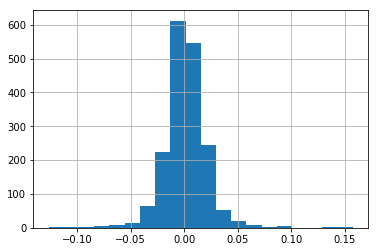

In [46]:
# Plot a histogram of the returns
# change number of bins with bins parameter
close_change_drop.hist(bins=20)

### Use boolean selection to check for normality
The plot above is bell-shaped and could possibly represent a normal distribution. To more formally check for normality we can count the number of observations that are within 1, 2, and 3 standard deviations. The [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) can be used to know if the data is approximately normal.

We first need to calculate the mean, standard deviation and get the number of observations.

In [47]:
# use size attribute to get number of observations
n_obs = close_change_drop.size
mean = close_change_drop.mean()
std = close_change_drop.std()

### Percentage of observations less than 1 standard deviation
Use boolean indexing to filter the Series to those value that are less than 1 standard deviation from the mean.

In [48]:
# make a boolean expression
criteria = abs(close_change_drop - mean) / std < 1

# do the boolean indexing
close_1std = close_change_drop[criteria]

# inspect
close_1std.head(10)

Date
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-13    0.013820
2010-01-14   -0.013632
2010-01-15   -0.001649
2010-01-19    0.003697
2010-01-20   -0.014341
2010-01-21    0.006678
2010-01-25   -0.009223
Name: Close, dtype: float64

In [49]:
# Do the same for 2 and 3 std
criteria = abs(close_change_drop - mean) / std < 2
close_2std = close_change_drop[criteria]

criteria = abs(close_change_drop - mean) / std < 3
close_3std = close_change_drop[criteria]

In [50]:
# Get final results and round to 3 decimals
pct_within1 = round(close_1std.size / n_obs, 3)
pct_within2 = round(close_2std.size / n_obs, 3)
pct_within3 = round(close_3std.size / n_obs, 3)

pct_within1, pct_within2, pct_within3

(0.787, 0.957, 0.985)

### Results Discussion
The percentages of returns within 1, 2 and 3 standard deviations are fairly far off the 68-95-99.7 rule. Much more of the data was concentrated around 1 standard deviation and 5 times as many returns than expected were greater than 3 standard deviations from the mean. This strongly suggests that a normal distribution would not be a good fit for this type of data.

### Simple way to count True values in a Series
Series that contain only boolean values can be counted using the **`sum`** method since True evaluates to 1 and False to 0. Let's recount the data points within 1 standard deviation using this method.

In [51]:
# use same criteria as before
criteria = abs(close_change_drop - mean) / std < 1

# inspect
criteria.head(10)

Date
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08    False
2010-01-11    False
2010-01-12    False
2010-01-13     True
2010-01-14     True
2010-01-15     True
2010-01-19     True
Name: Close, dtype: bool

In [52]:
# Use sum method to count True values
criteria.sum()

1423

In [53]:
# this is the same as
close_1std.size

1423

In [54]:
# can sum up everything in one line by wrapping expression in parentheses
(abs(close_change_drop - mean) / std < 1).sum()

1423

### What you should know
* Use .iloc and .loc to access elements in a Series
* Use [ ] when using boolean indexing
* Can create a 'criteria' variable or just pass the boolean expression into the [ ]
* Use &, |, ~ instead of and, or, not in pandas for boolean operations
* Wrap each boolean expression in parentheses
* Use .head to shorten Series output
* Know how to use Series methods 
* Assignment of one series to another (**`s = s1`**) does not create a new object.

We have only touched upon a small number of the methods in the Series data structure. If you suffer from FOMOOM (fear of missing out on methods) go here and use each method at least once - http://pandas.pydata.org/pandas-docs/stable/api.html#series

### Problem 1
<span  style="color:green; font-size:16px">Create a function that accepts a stock ticket symbol (amzn for example) and returns the percentage of prices within 1, 2, and 3 standard deviations from the mean. Use your function to return results for different stocks (tsla, fb, slb, gm, etc...)</span>

In [55]:
from pandas_datareader import data

def StockVariance(ticker, datasource='google'):
    try:
        series_close = data.DataReader(ticker,datasource)['Close']
    except:
        return('No Close data for stock {} using {}'.format(ticker, datasource))
    
    p1 = getbetween(series_close, -1, 1)
    p2 = getbetween(series_close, -2, 2)
    p3 = getbetween(series_close, -3, 3)
    
    return p1, p2, p3

    
def getbetween(s, lowersd=-1, uppersd=1):
    std = s.std()
    mean = s.mean()
    return ((s <= (mean + uppersd*std)) & (s >= (mean + lowersd*std))).sum()/ s.count() 
    

StockVariance("amzn")
    

(0.71515486725663713, 0.9209070796460177, 1.0)

### How to check the entire series for truth
Lets say we wanted to check if all the stock price returns were within 4 standard deviations from the mean. The **`all`** and **`any`** methods can be used to check Series of all boolean values.

In [56]:
# create a boolean Series checking values to be within 4 standard deviations
criteria = abs(close_change_drop - mean) / std < 4

# inspect criteria - the first 10 are true
criteria.head(10)

Date
2010-01-05    True
2010-01-06    True
2010-01-07    True
2010-01-08    True
2010-01-11    True
2010-01-12    True
2010-01-13    True
2010-01-14    True
2010-01-15    True
2010-01-19    True
Name: Close, dtype: bool

In [57]:
# now use all to check if they are all true. Looks like is at least one False
criteria.all()

False

In [40]:
# could do the same thing with 'any' method
# change criteria to be more than 4 std
criteria = abs(close_change_drop - mean) / std >= 4

criteria.any()

True

### Problem 2
<span  style="color:green; font-size:16px">Write a one line expression that returns the maximum number of standard deviations from the mean for any one day return.</span>

In [75]:
series_close = data.DataReader("amzn","google")['Close']
((series_close - series_close.mean()).abs()/series_close.mean()).max()

1.4420544014309509

# More Series Questions 
How to get help: Stackoverflow is no doubt the best resource to quickly find help to solve your pandas problems but you should be asking - how do the people who answer Stackoverflow questions know the answers? Are they just born with these magical powers? Perhaps, but more likely they look in the documentation. The pandas documentation is quite thorough with hundreds of examples and I encourage you to look through all of it if you get the chance - http://pandas.pydata.org/pandas-docs/stable/index.html

### Problem 3
<span  style="color:green; font-size:16px">Create a Series, **`tsla`**, by getting the closing price of Tesla motors (symbol TSLA) using the **`pandas_datareader`** library. Series  **`tsla`** will be continually referred to for the rest of the problems. Output the first 10 values.</span>

In [78]:
series_close = data.DataReader("tsla","google")['Close']
series_close.iloc[:10]

Date
2010-06-29    23.89
2010-06-30    23.83
2010-07-01    21.96
2010-07-02    19.20
2010-07-06    16.11
2010-07-07    15.80
2010-07-08    17.46
2010-07-09    17.40
2010-07-12    17.05
2010-07-13    18.14
Name: Close, dtype: float64

### Problem 4
<span  style="color:green; font-size:16px">There are many dozens of Series methods and attributes. Use the following methods correctly with variable **tsla** : **`rank, cummax, sample, describe, quantile, idxmax, empty`**. Make sure to read the documentation for correct usage. Use a new code cell for each command and remember to use the **`head`** method to restrict long output.</span>

In [90]:
s = data.DataReader("tsla","google")['Close']
s.rank()
s.cummax()
s.sample()
s.describe()
s.quantile()
s.idxmax()
s.empty

False

### Problem 5
<span  style="color:green; font-size:16px"> Sort **`tsla`** by descending values and save it to variable **`tsla1`**. Output the first 10 values to check that the sort happened correctly.</span>

In [101]:
tsla = data.DataReader("tsla","google")['Close']
tsla1 = tsla.sort_values(ascending=False)
tsla1.head(10)

Date
2014-09-04    286.04
2014-09-02    284.12
2015-07-20    282.26
2014-09-08    282.11
2014-09-03    281.19
2014-09-10    281.10
2017-02-14    280.98
2017-02-13    280.60
2014-09-11    280.31
2015-07-02    280.02
Name: Close, dtype: float64

### Problem 6
<span  style="color:green; font-size:16px">Use the **`sort_index`** method to re-sort **`tsla1`** back to its original ordering. Store this Series to **`tsla2`**. Use the **`equals`** method to check that **`tsla2`** does in fact equal **`tsla`**.</span>

In [102]:
tsla2 = tsla1.sort_index()
tsla2.equals(tsla)

True

### Problem 7
<span  style="color:green; font-size:16px">Instead of using the **`equals`** method, test equality between **`tsla`** and **`tsla2`** by using the comparison operator **`==`** and the **`all`** method.</span>

In [104]:
all(tsla == tsla2)

True

### Problem 8
<span  style="color:green; font-size:16px">Slicing! Using iloc, slice series **`tsla`**:<ol><li>Retrieve the first 6 elements</li><li>Retrieve every 18th element</li><li>Reverse the series</li><li>Write two ways to get every 4th element starting from the 993rd element to the 593rd</li><li>Chain your slicing multiple times by getting every other element, then every third element, then every 4th element, then every 5th element</li></ol>
</span>

Use **`head`** method to shorten long output.

In [111]:
tsla.iloc[:6]
tsla.iloc[::18]
tsla.iloc[::-1]
tsla.iloc[993:592:-1]
tsla.iloc[::2][::3][::4][::5]

Date
2010-06-29     23.89
2010-12-17     31.36
2011-06-10     27.86
2011-11-30     32.74
2012-05-23     31.02
2012-11-14     31.38
2013-05-09     69.40
2013-10-29    164.47
2014-04-23    207.99
2014-10-13    224.59
2015-04-07    203.25
2015-09-25    256.91
2016-03-18    232.74
2016-09-08    197.36
2017-03-02    250.48
Name: Close, dtype: float64

### Problem 9
<span  style="color:green; font-size:16px"> How many days did Tesla close above 100 and below 150?</span>

In [126]:
above = tsla > 100
below = tsla < 150
((tsla > 100) & (tsla < 150)).sum()


90

### Problem 10
<span  style="color:green; font-size:16px"> How many days did Tesla close below 50 or above 200?</span>

In [127]:
((tsla < 100) | (tsla > 200)).sum()

1390

### Problem 11
<span  style="color:green; font-size:16px"> Lookup the definition for interquartile range and smartly slice your way from series s until you are left with the IQR </span>

In [135]:
tsla[(tsla > tsla.quantile(.5-.25/2)) & (tsla < tsla.quantile(.5+.25/2))]

Date
2010-11-24     35.47
2010-11-26     35.32
2010-11-30     35.33
2012-03-12     36.01
2012-03-13     36.09
2012-03-14     35.29
2012-03-16     35.32
2012-03-26     37.40
2012-03-27     37.94
2012-03-28     37.85
2012-03-29     37.33
2012-03-30     37.24
2012-04-02     36.58
2012-04-03     38.01
2012-07-16     35.96
2012-12-11     35.28
2012-12-12     35.26
2013-01-02     35.36
2013-01-22     35.19
2013-01-23     36.00
2013-01-24     36.99
2013-01-25     36.98
2013-01-28     38.03
2013-01-29     37.95
2013-01-30     37.52
2013-01-31     37.51
2013-02-01     38.30
2013-02-04     37.74
2013-02-05     38.13
2013-02-06     39.17
               ...  
2016-11-03    187.42
2016-11-04    190.56
2016-11-07    193.21
2016-11-08    194.94
2016-11-09    190.06
2016-11-10    185.35
2016-11-11    188.56
2016-11-14    181.45
2016-11-15    183.77
2016-11-16    183.93
2016-11-17    188.66
2016-11-18    185.02
2016-11-21    184.52
2016-11-22    191.17
2016-11-23    193.14
2016-11-25    196.65
2016-11-

### Problem 12
<span  style="color:green; font-size:16px">Use the **`idxmax`** method to find the index labeled position of the highest closing price. Find out how many trading days it has been since tsla recorded it highest closing price.</span>

In [145]:
tsla.loc[tsla.idxmax():].size

634

### Problem 13
<span  style="color:green; font-size:16px">Assign Series tsla to tsla3 **`tsla3 = tsla`** and then change the value of the 0th element of tsla3 to 100. What has happened to tsla? We didn't talk about series assignment, but does it work as you would expect?</span>

In [147]:
tsla3 = tsla
tsla3.iloc[0] = 100
tsla.iloc[0]

100.0

### Problem 14
<span  style="color:green; font-size:16px">Assign every 2nd element of **`tsla3`** the mean of **`tsla3`**. What happened to **`tsla`**? Is it the same size? Now assign elements 100 to 900 of **`tsla`** the variance of **`tsla`**. How much has each Series changed?</span>

In [148]:
tsla3.iloc[0::2] = tsla3.mean()
tsla.head(10)

Date
2010-06-29    132.105311
2010-06-30     23.830000
2010-07-01    132.105311
2010-07-02     19.200000
2010-07-06    132.105311
2010-07-07     15.800000
2010-07-08    132.105311
2010-07-09     17.400000
2010-07-12    132.105311
2010-07-13     18.140000
Name: Close, dtype: float64

### Problem 15
<span  style="color:green; font-size:16px">Get the original **`tsla`** dataset back by running code in Problem 3 again. Now redo problem 13 except assign **`tsla3`** a be copy of **`tsla`** using the **`copy`** Series method.</span>

In [155]:
tsla = data.DataReader("tsla","google")['Close']
tsla.head()
tsla3 = tsla.copy()
print(tsla3.equals(tsla))
tsla3.iloc[0] = 100
tsla.iloc[0]
tsla3.iloc[0]
print(tsla3.equals(tsla))

True
False


### Problem 16
<span  style="color:green; font-size:16px">Using the inversion operator, the tilde (**`~`**) ouput a Series of all **`tsla`** values greater than 270.</span>

In [161]:
tsla[~(tsla<270)]

Date
2014-09-02    284.12
2014-09-03    281.19
2014-09-04    286.04
2014-09-05    277.39
2014-09-08    282.11
2014-09-09    278.48
2014-09-10    281.10
2014-09-11    280.31
2014-09-12    279.20
2015-07-02    280.02
2015-07-06    279.72
2015-07-17    274.66
2015-07-20    282.26
2015-08-05    270.13
2017-02-13    280.60
2017-02-14    280.98
2017-02-15    279.76
2017-02-17    272.23
2017-02-21    277.39
2017-02-22    273.51
Name: Close, dtype: float64

### Problem 17
<span  style="color:green; font-size:16px">Read the documentation on the **`where`** Series method and use it with **`tsla`** to change all values less than 100 to 0.</span>

In [174]:
tsla.where(tsla > 100, 0)

Date
2010-06-29      0.00
2010-06-30      0.00
2010-07-01      0.00
2010-07-02      0.00
2010-07-06      0.00
2010-07-07      0.00
2010-07-08      0.00
2010-07-09      0.00
2010-07-12      0.00
2010-07-13      0.00
2010-07-14      0.00
2010-07-15      0.00
2010-07-16      0.00
2010-07-19      0.00
2010-07-20      0.00
2010-07-21      0.00
2010-07-22      0.00
2010-07-23      0.00
2010-07-26      0.00
2010-07-27      0.00
2010-07-28      0.00
2010-07-29      0.00
2010-07-30      0.00
2010-08-02      0.00
2010-08-03      0.00
2010-08-04      0.00
2010-08-05      0.00
2010-08-06      0.00
2010-08-09      0.00
2010-08-10      0.00
               ...  
2017-01-27    252.95
2017-01-30    250.63
2017-01-31    251.93
2017-02-01    249.24
2017-02-02    251.55
2017-02-03    251.33
2017-02-06    257.77
2017-02-07    257.48
2017-02-08    262.08
2017-02-09    269.20
2017-02-10    269.23
2017-02-13    280.60
2017-02-14    280.98
2017-02-15    279.76
2017-02-16    268.95
2017-02-17    272.23
2017-02-

### Problem 18
<span  style="color:green; font-size:16px">Read the documentation on the **`mask`** Series method and use it with **`tsla`** to change all values greater than or equal to 100 to 0.</span>

In [177]:
tsla.mask(tsla > 100, 0)

Date
2010-06-29    23.89
2010-06-30    23.83
2010-07-01    21.96
2010-07-02    19.20
2010-07-06    16.11
2010-07-07    15.80
2010-07-08    17.46
2010-07-09    17.40
2010-07-12    17.05
2010-07-13    18.14
2010-07-14    19.84
2010-07-15    19.89
2010-07-16    20.64
2010-07-19    21.91
2010-07-20    20.30
2010-07-21    20.22
2010-07-22    21.00
2010-07-23    21.29
2010-07-26    20.95
2010-07-27    20.55
2010-07-28    20.72
2010-07-29    20.35
2010-07-30    19.94
2010-08-02    20.92
2010-08-03    21.95
2010-08-04    21.26
2010-08-05    20.45
2010-08-06    19.59
2010-08-09    19.60
2010-08-10    19.03
              ...  
2017-01-27     0.00
2017-01-30     0.00
2017-01-31     0.00
2017-02-01     0.00
2017-02-02     0.00
2017-02-03     0.00
2017-02-06     0.00
2017-02-07     0.00
2017-02-08     0.00
2017-02-09     0.00
2017-02-10     0.00
2017-02-13     0.00
2017-02-14     0.00
2017-02-15     0.00
2017-02-16     0.00
2017-02-17     0.00
2017-02-21     0.00
2017-02-22     0.00
2017-02-23     